# Kaggle Breast Cancer Wisconsin Diagnosis using KNN and Cross Validation

Dataset : It is given by Kaggle from UCI Machine Learning Repository, in one of its challenges. It is a dataset of Breast Cancer patients with Malignant and Benign tumor. K-nearest neighbour algorithm is used to predict whether is patient is having cancer (Malignant tumour) or not (Benign tumour). Lets start by loading the data:

In [4]:
import pandas as pd
df = pd.read_csv("data 2.csv")
print (df.head)

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Dropping column with no role in prediction

In [6]:
df.drop(['Unnamed: 32', 'id'], axis = 1, inplace=True)
print(df.shape)

(569, 31)


Converting the diagnosis value of M and B to a numerical value where M (Malignant) = 1 and B (Benign) = 0

In [7]:
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0

df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploratory Data Analysis

Lets create some scatter plots with regression lines to determine correlations and groups

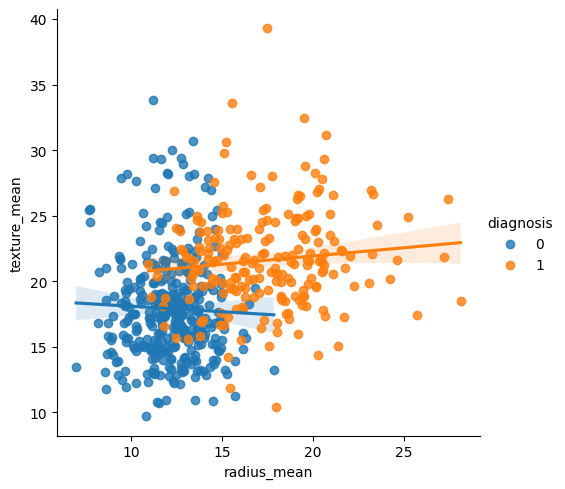

In [8]:
import seaborn as sns
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)

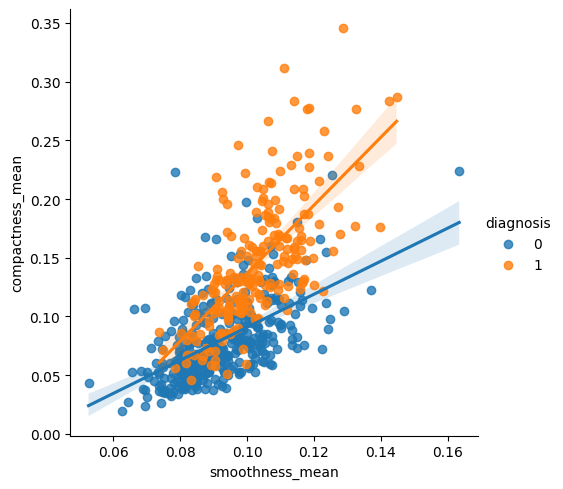

In [9]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', data = df, hue = 'diagnosis')

Lets see if our data is balanced or unbalanced:

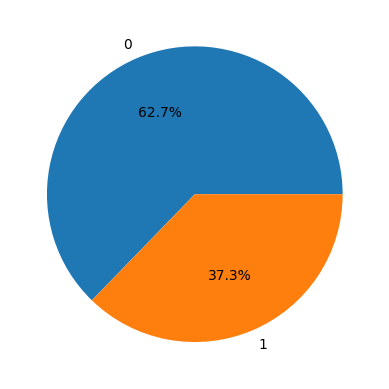

In [10]:
import matplotlib.pyplot as plt
plt.pie(df['diagnosis'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')
plt.show()

We can see the data is roughly balanced at a 2:1 benign/malignent ratio. We can stratify the data on our target variable in model development.

Lets now visualise the correlation of our features:

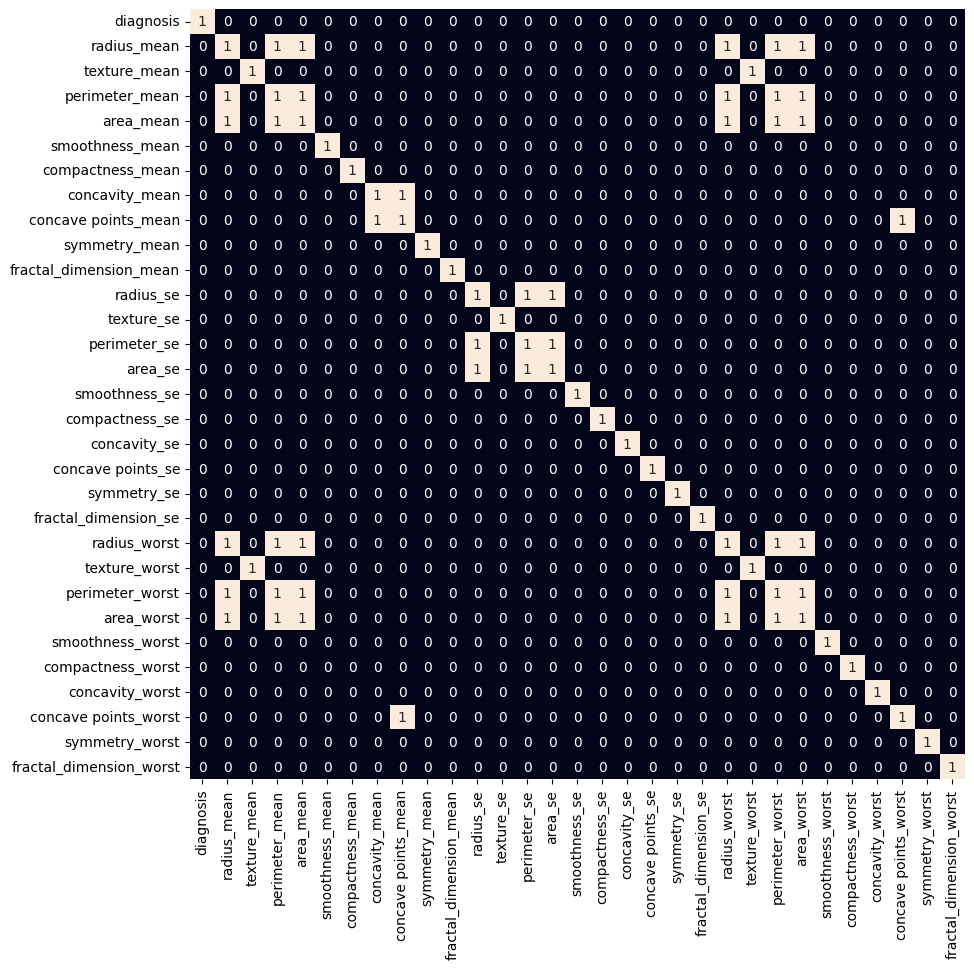

In [16]:
import seaborn as sns
plt.figure(figsize=(10, 10)) 
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

# Data Splitting and Model Development & Evaluation

In [17]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)
# use stratify as our training data is unbalanced

knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [25]:
knn.score(X_test, y_test)

0.9468085106382979

Now lets perform cross validation to assess choice of K

In [29]:
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score, StratifiedKFold


# Create a stratified 10-fold splitter
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


# Perform 10-fold stratified cross-validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn, X_train, y_train, cv=skf, scoring='accuracy'
    )
    cv_scores.append(scores.mean())
    print(scores.mean())

0.934412955465587
0.9186909581646423
0.9186909581646423
0.9238191632928474
0.9211875843454791
0.9211875843454791
0.9211875843454791
0.9238191632928474
0.9159244264507421
0.9132928475033738
0.9106612685560054
0.9080296896086371
0.9080296896086371
0.9053981106612685
0.9027665317139002
0.9001349527665317
0.9080296896086368
0.9053981106612683
0.9053981106612683
0.9053981106612683
0.9053981106612685
0.9053981106612683
0.9053981106612683
0.9053981106612683
0.9053981106612683


The optimal number of neighbors is  1 


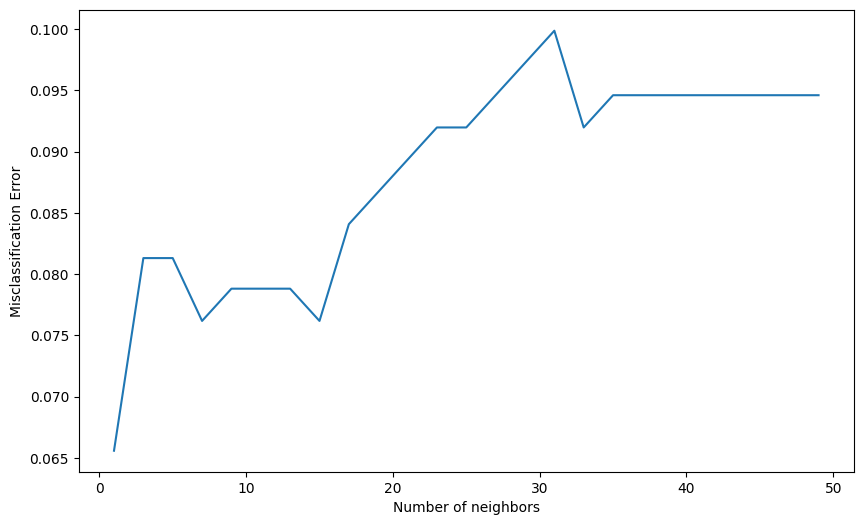

In [28]:
MSE = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

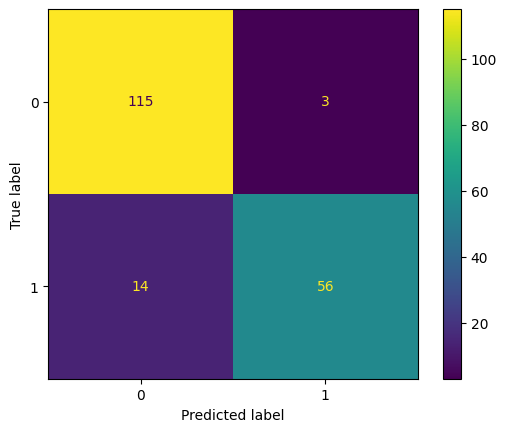

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(knn1, X_test, y_test)
plt.show()